In [1]:
# Importing Necessary Modules
# md traj can be installed via conda easily.
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import os

In [16]:
# Load in trajectory (note I used CPPTRAJ to first combine and strip the trajectories of the water)
Apo_3W5A = md.load('3W5A_original_strip_50.nc',top = '3W5A_original_strip_top.parm7')
# Use selection criteria to find the atom indices of the regions of the domain that we care about
IM_domain_inds = Apo_3W5A.top.select('resid 40 to 125 or resid 740 to 991 or resid 240 to 340')
A_domain_inds = Apo_3W5A.top.select('resid 0 to 40 or resid 125 to 240')
P_domain_inds = Apo_3W5A.top.select('resid 600 to 740 or resid 340 to 355')
N_domain_inds = Apo_3W5A.top.select('resid 355 to 600')

# Create a copy of the trajectory using only the specified indicies
IM_domain = Apo_3W5A.atom_slice(IM_domain_inds, inplace = False)
A_domain = Apo_3W5A.atom_slice(A_domain_inds, inplace = False)
P_domain = Apo_3W5A.atom_slice(P_domain_inds, inplace = False)
N_domain = Apo_3W5A.atom_slice(N_domain_inds, inplace = False)

# Compute the center of mass of the specified domains and calculate the euclidian distance between the centers of mass.
Apo_A_N_dist = np.linalg.norm(md.compute_center_of_mass(A_domain) - md.compute_center_of_mass(N_domain), axis  = 1)
Apo_A_P_dist = np.linalg.norm(md.compute_center_of_mass(A_domain) - md.compute_center_of_mass(P_domain), axis  = 1)
Apo_N_P_dist = np.linalg.norm(md.compute_center_of_mass(N_domain) - md.compute_center_of_mass(P_domain), axis  = 1)

In [3]:
# Load in trajectory (note I used CPPTRAJ to first combine and strip the trajectories of the water)
ATP_3W5A = md.load('3W5A_ATP_original_new_nucleotide_strip_50.nc',top = '3W5A_ATP_original_new_nucleotide_strip_top.parm7')
# Use selection criteria to find the atom indices of the regions of the domain that we care about
IM_domain_inds = ATP_3W5A.top.select('resid 40 to 125 or resid 740 to 991 or resid 240 to 340')
A_domain_inds = ATP_3W5A.top.select('resid 0 to 40 or resid 125 to 240')
P_domain_inds = ATP_3W5A.top.select('resid 600 to 740 or resid 340 to 355')
N_domain_inds = ATP_3W5A.top.select('resid 355 to 600')

# Create a copy of the trajectory using only the specified indicies
IM_domain = ATP_3W5A.atom_slice(IM_domain_inds, inplace = False)
A_domain = ATP_3W5A.atom_slice(A_domain_inds, inplace = False)
P_domain = ATP_3W5A.atom_slice(P_domain_inds, inplace = False)
N_domain = ATP_3W5A.atom_slice(N_domain_inds, inplace = False)

# Compute the center of mass of the specified domains and calculate the euclidian distance between the centers of mass.
ATP_A_N_dist = np.linalg.norm(md.compute_center_of_mass(A_domain) - md.compute_center_of_mass(N_domain), axis  = 1)
ATP_A_P_dist = np.linalg.norm(md.compute_center_of_mass(A_domain) - md.compute_center_of_mass(P_domain), axis  = 1)
ATP_N_P_dist = np.linalg.norm(md.compute_center_of_mass(N_domain) - md.compute_center_of_mass(P_domain), axis  = 1)

In [4]:
# Load in trajectory (note I used CPPTRAJ to first combine and strip the trajectories of the water)
dATP_3W5A = md.load('3W5A_dATP_original_new_nucleotide_strip_50.nc',top = '3W5A_dATP_original_new_nucleotide_strip_top.parm7')
# Use selection criteria to find the atom indices of the regions of the domain that we care about
IM_domain_inds = dATP_3W5A.top.select('resid 40 to 125 or resid 740 to 991 or resid 240 to 340')
A_domain_inds = dATP_3W5A.top.select('resid 0 to 40 or resid 125 to 240')
P_domain_inds = dATP_3W5A.top.select('resid 600 to 740 or resid 340 to 355')
N_domain_inds = dATP_3W5A.top.select('resid 355 to 600')

# Create a copy of the trajectory using only the specified indicies
IM_domain = dATP_3W5A.atom_slice(IM_domain_inds, inplace = False)
A_domain = dATP_3W5A.atom_slice(A_domain_inds, inplace = False)
P_domain = dATP_3W5A.atom_slice(P_domain_inds, inplace = False)
N_domain = dATP_3W5A.atom_slice(N_domain_inds, inplace = False)

# Compute the center of mass of the specified domains and calculate the euclidian distance between the centers of mass.
dATP_A_N_dist = np.linalg.norm(md.compute_center_of_mass(A_domain) - md.compute_center_of_mass(N_domain), axis  = 1)
dATP_A_P_dist = np.linalg.norm(md.compute_center_of_mass(A_domain) - md.compute_center_of_mass(P_domain), axis  = 1)
dATP_N_P_dist = np.linalg.norm(md.compute_center_of_mass(N_domain) - md.compute_center_of_mass(P_domain), axis  = 1)

(0.0, 1.25)

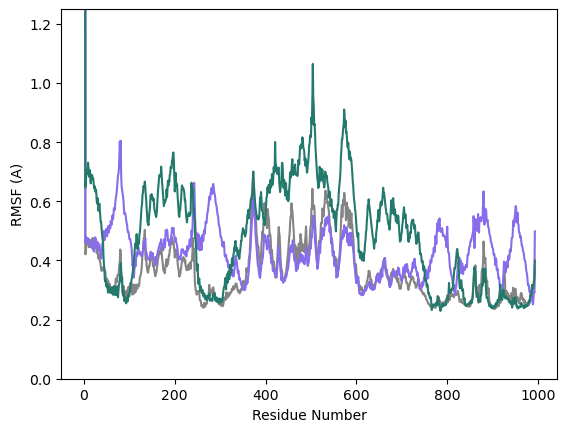

In [17]:
# Calculate the RMSF for the alpha carbon atoms
Apo_rmsf = md.rmsf(Apo_3W5A, Apo_3W5A, frame = 0, atom_indices=ATP_3W5A.top.select('name CA'))
ATP_rmsf = md.rmsf(ATP_3W5A, ATP_3W5A, frame = 0, atom_indices=ATP_3W5A.top.select('name CA'))
dATP_rmsf = md.rmsf(dATP_3W5A, dATP_3W5A, atom_indices=dATP_3W5A.top.select('name CA'))
plt.plot(Apo_rmsf, label = 'Apo', color = [0.517, 0.517, 0.517])
plt.plot(ATP_rmsf, label = 'ATP', color = [0.529, 0.429, 0.922])
plt.plot(dATP_rmsf, label = 'dATP', color = [0.143, 0.476, 0.429])
plt.xlabel('Residue Number')
plt.ylabel('RMSF (A)')
plt.ylim(0,1.25)

Text(0, 0.5, 'RMSD (A)')

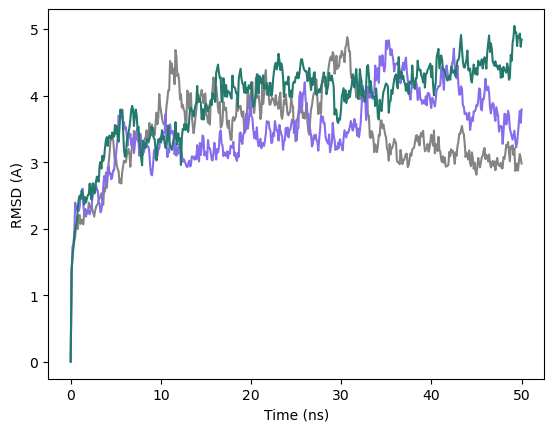

In [19]:
## RMSD Calculations
Apo_rmsd = md.rmsd(Apo_3W5A, Apo_3W5A,frame=0,atom_indices=Apo_3W5A.top.select('protein'))
plt.plot(np.linspace(0,50,500), Apo_rmsd*10, label = 'Apo', color = [0.517,0.517,0.517])

ATP_rmsd = md.rmsd(ATP_3W5A, ATP_3W5A,frame=0,atom_indices=ATP_3W5A.top.select('protein'))
plt.plot(np.linspace(0,50,500), ATP_rmsd*10, label = 'ATP', color = [0.529, 0.429, 0.922])

dATP_rmsd = md.rmsd(dATP_3W5A, dATP_3W5A, frame=0, atom_indices=dATP_3W5A.top.select('protein'))
plt.plot(np.linspace(0,50,500), dATP_rmsd*10, label = 'dATP', color = [0.143, 0.476, 0.429])

plt.xlabel('Time (ns)')
plt.ylabel('RMSD (A)')

Text(0, 0.5, 'A-N Distance (A)')

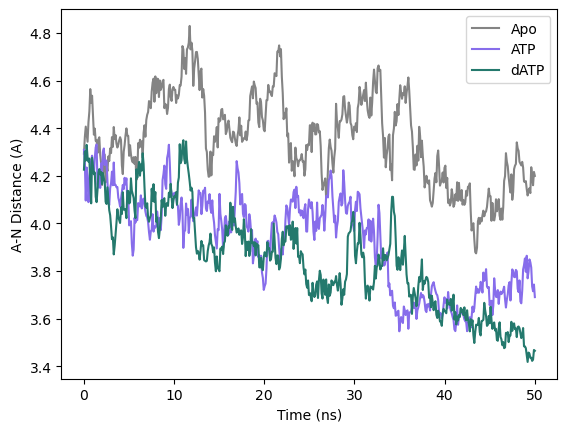

In [22]:
# Plot Results
plt.plot(np.linspace(0,50,500), Apo_A_N_dist, label = 'Apo', color = [0.517, 0.517, 0.517])
plt.plot(np.linspace(0,50,500), ATP_A_N_dist, label = 'ATP', color = [0.529, 0.429, 0.922])
plt.plot(np.linspace(0,50,500), dATP_A_N_dist, label = 'dATP', color = [0.143, 0.476, 0.429])
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('A-N Distance (A)')

Text(0, 0.5, 'A-P Distance (A)')

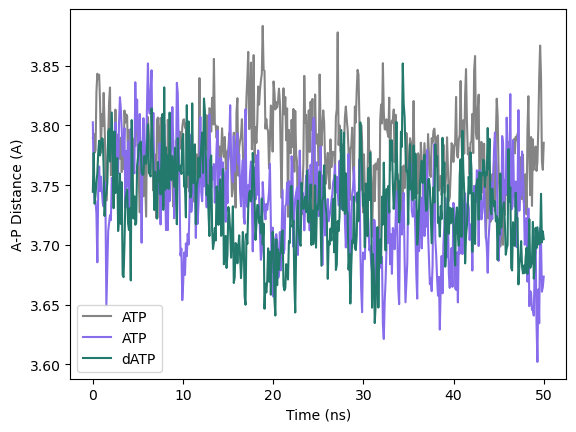

In [23]:
# Plot Results
plt.plot(np.linspace(0,50,500), Apo_A_P_dist, label = 'ATP', color = [0.517, 0.517, 0.517])
plt.plot(np.linspace(0,50,500), ATP_A_P_dist, label = 'ATP', color = [0.529, 0.429, 0.922])
plt.plot(np.linspace(0,50,500), dATP_A_P_dist, label = 'dATP', color = [0.143, 0.476, 0.429])
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('A-P Distance (A)')

Text(0, 0.5, 'N-P Distance (A)')

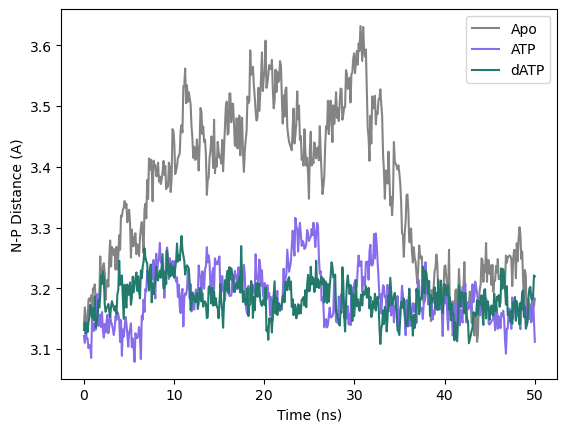

In [25]:
# Plot Results
plt.plot(np.linspace(0,50,500), Apo_N_P_dist, label = 'Apo', color = [0.517, 0.517, 0.517])
plt.plot(np.linspace(0,50,500), ATP_N_P_dist, label = 'ATP', color = [0.529, 0.429, 0.922])
plt.plot(np.linspace(0,50,500), dATP_N_P_dist, label = 'dATP', color = [0.143, 0.476, 0.429])
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('N-P Distance (A)')

In [29]:
# Find distances between ATP and important residues
ATP = ATP_3W5A.top.select('resname ATP')
res_560_ATP = ATP_3W5A.top.select('resid 560')
res_494_ATP = ATP_3W5A.top.select('resid 494')
res_353_ATP = ATP_3W5A.top.select('resid 353')
res_487_ATP = ATP_3W5A.top.select('resid 487')
res_515_ATP = ATP_3W5A.top.select('resid 515')
res_626_ATP = ATP_3W5A.top.select('resid 626')
res_489_ATP = ATP_3W5A.top.select('resid 489')

dATP = dATP_3W5A.top.select('resname DTP')
res_560_dATP = dATP_3W5A.top.select('resid 560')
res_494_dATP = dATP_3W5A.top.select('resid 494')
res_353_dATP = dATP_3W5A.top.select('resid 353')
res_487_dATP = dATP_3W5A.top.select('resid 487')
res_515_dATP = dATP_3W5A.top.select('resid 515')
res_626_dATP = dATP_3W5A.top.select('resid 626')
res_489_dATP = dATP_3W5A.top.select('resid 489')

# Create a copy of the trajectory using only the specified indicies
ATP_slice = ATP_3W5A.atom_slice(ATP, inplace = False)
res_560_slice_ATP = ATP_3W5A.atom_slice(res_560_ATP, inplace = False)
res_494_slice_ATP = ATP_3W5A.atom_slice(res_494_ATP, inplace = False)
res_353_slice_ATP = ATP_3W5A.atom_slice(res_353_ATP, inplace = False)
res_487_slice_ATP = ATP_3W5A.atom_slice(res_487_ATP, inplace = False)
res_515_slice_ATP = ATP_3W5A.atom_slice(res_515_ATP, inplace = False)
res_626_slice_ATP = ATP_3W5A.atom_slice(res_626_ATP, inplace = False)
res_489_slice_ATP = ATP_3W5A.atom_slice(res_489_ATP, inplace = False)

dATP_slice = dATP_3W5A.atom_slice(dATP, inplace = False)
res_560_slice_dATP = dATP_3W5A.atom_slice(res_560_dATP, inplace = False)
res_494_slice_dATP = dATP_3W5A.atom_slice(res_494_dATP, inplace = False)
res_353_slice_dATP = dATP_3W5A.atom_slice(res_353_dATP, inplace = False)
res_487_slice_dATP = dATP_3W5A.atom_slice(res_487_dATP, inplace = False)
res_515_slice_dATP = dATP_3W5A.atom_slice(res_515_dATP, inplace = False)
res_626_slice_dATP = dATP_3W5A.atom_slice(res_626_dATP, inplace = False)
res_489_slice_dATP = dATP_3W5A.atom_slice(res_489_dATP, inplace = False)

# Compute the center of mass of the specified domains and calculate the euclidian distance between the centers of mass.
ATP_560_dist = np.linalg.norm(md.compute_center_of_mass(ATP_slice) - md.compute_center_of_mass(res_560_slice_ATP), axis  = 1)
ATP_494_dist = np.linalg.norm(md.compute_center_of_mass(ATP_slice) - md.compute_center_of_mass(res_494_slice_ATP), axis  = 1)
ATP_353_dist = np.linalg.norm(md.compute_center_of_mass(ATP_slice) - md.compute_center_of_mass(res_353_slice_ATP), axis  = 1)
ATP_487_dist = np.linalg.norm(md.compute_center_of_mass(ATP_slice) - md.compute_center_of_mass(res_487_slice_ATP), axis  = 1)
ATP_515_dist = np.linalg.norm(md.compute_center_of_mass(ATP_slice) - md.compute_center_of_mass(res_515_slice_ATP), axis  = 1)
ATP_626_dist = np.linalg.norm(md.compute_center_of_mass(ATP_slice) - md.compute_center_of_mass(res_626_slice_ATP), axis  = 1)
ATP_489_dist = np.linalg.norm(md.compute_center_of_mass(ATP_slice) - md.compute_center_of_mass(res_489_slice_ATP), axis  = 1)

dATP_560_dist = np.linalg.norm(md.compute_center_of_mass(dATP_slice) - md.compute_center_of_mass(res_560_slice_dATP), axis  = 1)
dATP_494_dist = np.linalg.norm(md.compute_center_of_mass(dATP_slice) - md.compute_center_of_mass(res_494_slice_dATP), axis  = 1)
dATP_353_dist = np.linalg.norm(md.compute_center_of_mass(dATP_slice) - md.compute_center_of_mass(res_353_slice_dATP), axis  = 1)
dATP_487_dist = np.linalg.norm(md.compute_center_of_mass(dATP_slice) - md.compute_center_of_mass(res_487_slice_dATP), axis  = 1)
dATP_515_dist = np.linalg.norm(md.compute_center_of_mass(dATP_slice) - md.compute_center_of_mass(res_515_slice_dATP), axis  = 1)
dATP_626_dist = np.linalg.norm(md.compute_center_of_mass(dATP_slice) - md.compute_center_of_mass(res_626_slice_dATP), axis  = 1)
dATP_489_dist = np.linalg.norm(md.compute_center_of_mass(dATP_slice) - md.compute_center_of_mass(res_489_slice_dATP), axis  = 1)


Text(0, 0.5, '(d)ATP-ARG 560 Distance (A)')

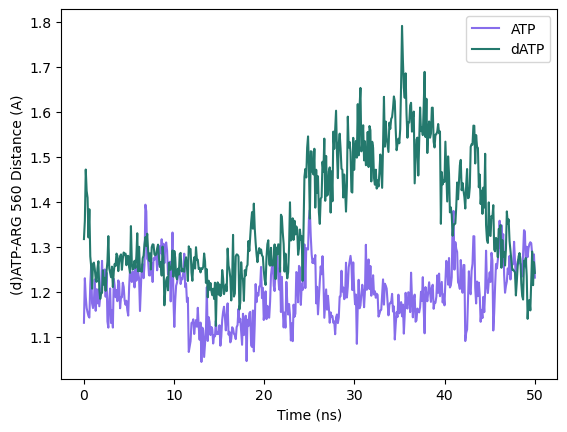

In [30]:
# Plot Results
plt.plot(np.linspace(0,50,500), ATP_560_dist, label = 'ATP', color = [0.529, 0.429, 0.922])
plt.plot(np.linspace(0,50,500), dATP_560_dist, label = 'dATP', color = [0.143, 0.476, 0.429])
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('(d)ATP-ARG 560 Distance (A)')

Text(0, 0.5, '(d)ATP-Gly 626 Distance (A)')

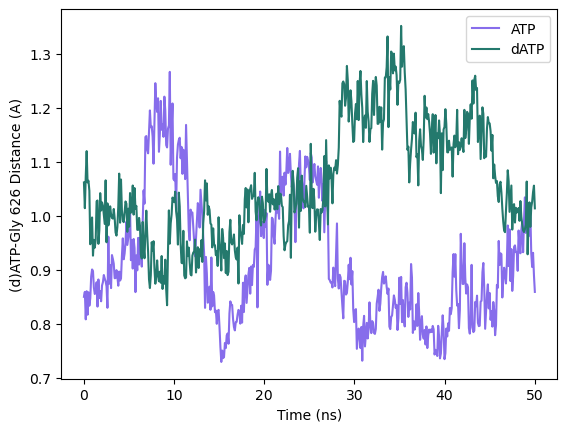

In [31]:
# Plot Results
plt.plot(np.linspace(0,50,500), ATP_626_dist, label = 'ATP', color = [0.529, 0.429, 0.922])
plt.plot(np.linspace(0,50,500), dATP_626_dist, label = 'dATP', color = [0.143, 0.476, 0.429])
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('(d)ATP-Gly 626 Distance (A)')

Text(0, 0.5, '(d)ATP-LYS 352 Distance (A)')

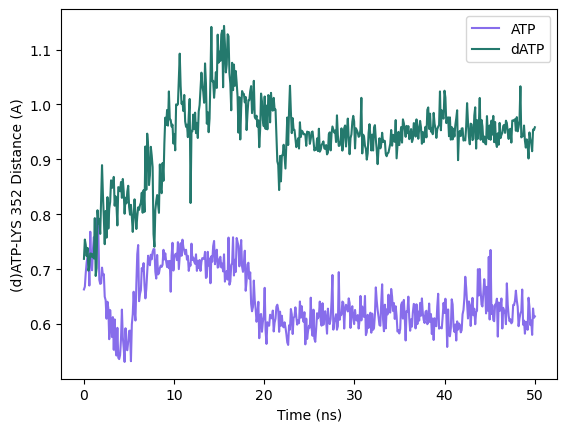

Text(0, 0.5, '(d)ATP-THR 353 Distance (A)')

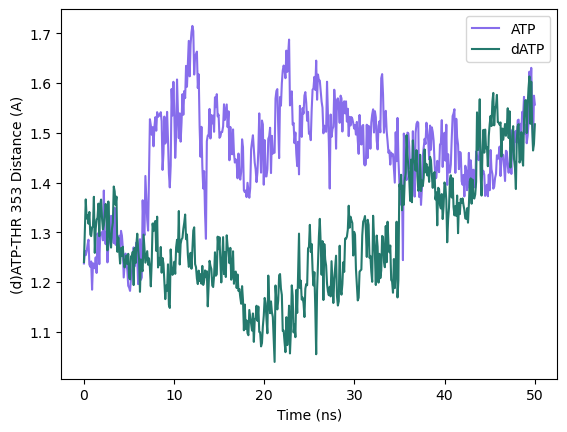

In [32]:
# Plot Results
plt.plot(np.linspace(0,50,500), ATP_353_dist, label = 'ATP', color = [0.529, 0.429, 0.922])
plt.plot(np.linspace(0,50,500), dATP_353_dist, label = 'dATP', color = [0.143, 0.476, 0.429])
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('(d)ATP-THR 353 Distance (A)')

Text(0, 0.5, '(d)ATP-PHE 487 Distance (A)')

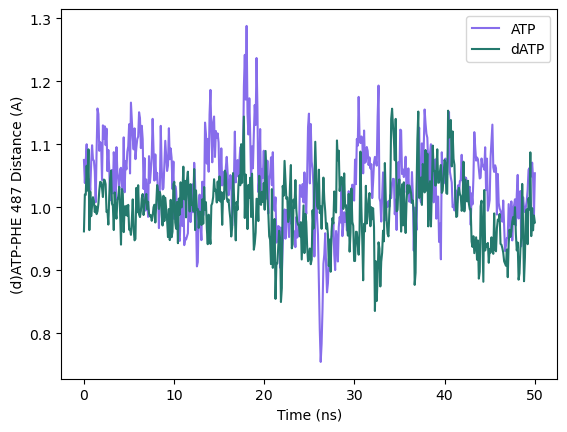

In [33]:
# Plot Results
plt.plot(np.linspace(0,50,500), ATP_487_dist, label = 'ATP', color = [0.529, 0.429, 0.922])
plt.plot(np.linspace(0,50,500), dATP_487_dist, label = 'dATP', color = [0.143, 0.476, 0.429])
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('(d)ATP-PHE 487 Distance (A)')

Text(0, 0.5, '(d)ATP-LYS 515 Distance (A)')

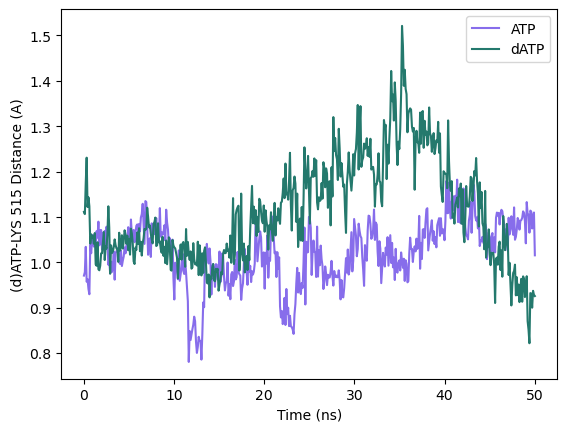

In [34]:
# Plot Results
plt.plot(np.linspace(0,50,500), ATP_515_dist, label = 'ATP', color = [0.529, 0.429, 0.922])
plt.plot(np.linspace(0,50,500), dATP_515_dist, label = 'dATP', color = [0.143, 0.476, 0.429])
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('(d)ATP-LYS 515 Distance (A)')

Text(0, 0.5, '(d)ATP-MET 494 Distance (A)')

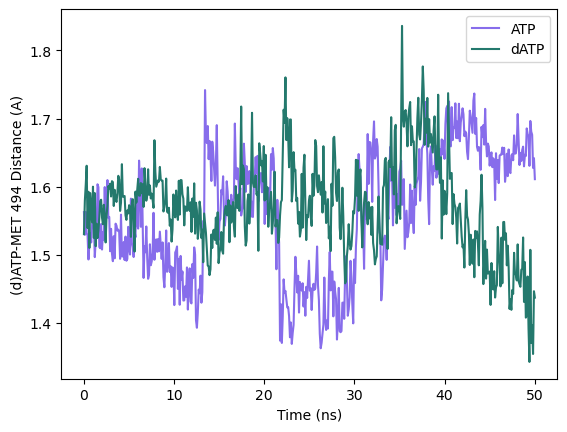

In [36]:
# Plot Results
plt.plot(np.linspace(0,50,500), ATP_494_dist, label = 'ATP', color = [0.529, 0.429, 0.922])
plt.plot(np.linspace(0,50,500), dATP_494_dist, label = 'dATP', color = [0.143, 0.476, 0.429])
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('(d)ATP-MET 494 Distance (A)')

Text(0, 0.5, '(d)ATP-ARG 489 Distance (A)')

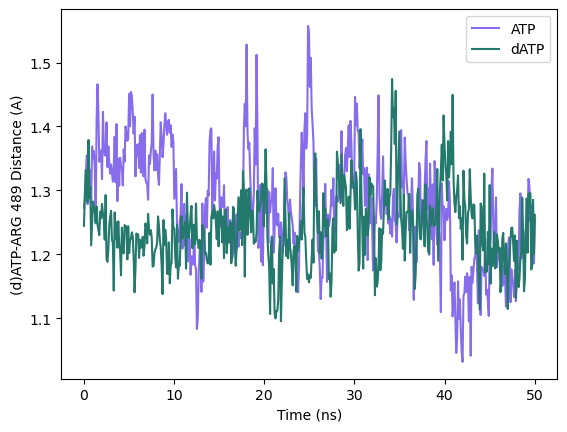

In [37]:
# Plot Results
plt.plot(np.linspace(0,50,500), ATP_489_dist, label = 'ATP', color = [0.529, 0.429, 0.922])
plt.plot(np.linspace(0,50,500), dATP_489_dist, label = 'dATP', color = [0.143, 0.476, 0.429])
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('(d)ATP-ARG 489 Distance (A)')

In [38]:
#Find distances between TM helices
Helix_1_inds_Apo = Apo_3W5A.top.select('resid 49 to 75')
Helix_2_inds_Apo = Apo_3W5A.top.select('resid 86 to 122')
Helix_3_inds_Apo = Apo_3W5A.top.select('resid 248 to 278')
Helix_4_inds_Apo = Apo_3W5A.top.select('resid 288 to 329')
Helix_5_inds_Apo = Apo_3W5A.top.select('resid 740 to 781')
Helix_6_inds_Apo = Apo_3W5A.top.select('resid 789 to 809')
Helix_7_inds_Apo = Apo_3W5A.top.select('resid 831 to 857')
Helix_8_inds_Apo = Apo_3W5A.top.select('resid 888 to 916')
Helix_9_inds_Apo = Apo_3W5A.top.select('resid 927 to 948')
Helix_10_inds_Apo = Apo_3W5A.top.select('resid 964 to 990')

Helix_1_inds_ATP = ATP_3W5A.top.select('resid 49 to 75')
Helix_2_inds_ATP = ATP_3W5A.top.select('resid 86 to 122')
Helix_3_inds_ATP = ATP_3W5A.top.select('resid 248 to 278')
Helix_4_inds_ATP = ATP_3W5A.top.select('resid 288 to 329')
Helix_5_inds_ATP = ATP_3W5A.top.select('resid 740 to 781')
Helix_6_inds_ATP = ATP_3W5A.top.select('resid 789 to 809')
Helix_7_inds_ATP = ATP_3W5A.top.select('resid 831 to 857')
Helix_8_inds_ATP = ATP_3W5A.top.select('resid 888 to 916')
Helix_9_inds_ATP = ATP_3W5A.top.select('resid 927 to 948')
Helix_10_inds_ATP = ATP_3W5A.top.select('resid 964 to 990')

Helix_1_inds_dATP = dATP_3W5A.top.select('resid 49 to 75')
Helix_2_inds_dATP = dATP_3W5A.top.select('resid 86 to 122')
Helix_3_inds_dATP = dATP_3W5A.top.select('resid 248 to 278')
Helix_4_inds_dATP = dATP_3W5A.top.select('resid 288 to 329')
Helix_5_inds_dATP = dATP_3W5A.top.select('resid 740 to 781')
Helix_6_inds_dATP = dATP_3W5A.top.select('resid 789 to 809')
Helix_7_inds_dATP = dATP_3W5A.top.select('resid 831 to 857')
Helix_8_inds_dATP = dATP_3W5A.top.select('resid 888 to 916')
Helix_9_inds_dATP = dATP_3W5A.top.select('resid 927 to 948')
Helix_10_inds_dATP = dATP_3W5A.top.select('resid 964 to 990')

# Create a copy of the trajectory using only the specified indicies
Helix_1_Apo = Apo_3W5A.atom_slice(Helix_1_inds_Apo, inplace = False)
Helix_2_Apo = Apo_3W5A.atom_slice(Helix_2_inds_Apo, inplace = False)
Helix_3_Apo = Apo_3W5A.atom_slice(Helix_3_inds_Apo, inplace = False)
Helix_4_Apo = Apo_3W5A.atom_slice(Helix_4_inds_Apo, inplace = False)
Helix_5_Apo = Apo_3W5A.atom_slice(Helix_5_inds_Apo, inplace = False)
Helix_6_Apo = Apo_3W5A.atom_slice(Helix_6_inds_Apo, inplace = False)
Helix_7_Apo = Apo_3W5A.atom_slice(Helix_7_inds_Apo, inplace = False)
Helix_8_Apo = Apo_3W5A.atom_slice(Helix_8_inds_Apo, inplace = False)
Helix_9_Apo = Apo_3W5A.atom_slice(Helix_9_inds_Apo, inplace = False)
Helix_10_Apo = Apo_3W5A.atom_slice(Helix_10_inds_Apo, inplace = False)

Helix_1_ATP = ATP_3W5A.atom_slice(Helix_1_inds_ATP, inplace = False)
Helix_2_ATP = ATP_3W5A.atom_slice(Helix_2_inds_ATP, inplace = False)
Helix_3_ATP = ATP_3W5A.atom_slice(Helix_3_inds_ATP, inplace = False)
Helix_4_ATP = ATP_3W5A.atom_slice(Helix_4_inds_ATP, inplace = False)
Helix_5_ATP = ATP_3W5A.atom_slice(Helix_5_inds_ATP, inplace = False)
Helix_6_ATP = ATP_3W5A.atom_slice(Helix_6_inds_ATP, inplace = False)
Helix_7_ATP = ATP_3W5A.atom_slice(Helix_7_inds_ATP, inplace = False)
Helix_8_ATP = ATP_3W5A.atom_slice(Helix_8_inds_ATP, inplace = False)
Helix_9_ATP = ATP_3W5A.atom_slice(Helix_9_inds_ATP, inplace = False)
Helix_10_ATP = ATP_3W5A.atom_slice(Helix_10_inds_ATP, inplace = False)

Helix_1_dATP = dATP_3W5A.atom_slice(Helix_1_inds_dATP, inplace = False)
Helix_2_dATP = dATP_3W5A.atom_slice(Helix_2_inds_dATP, inplace = False)
Helix_3_dATP = dATP_3W5A.atom_slice(Helix_3_inds_dATP, inplace = False)
Helix_4_dATP = dATP_3W5A.atom_slice(Helix_4_inds_dATP, inplace = False)
Helix_5_dATP = dATP_3W5A.atom_slice(Helix_5_inds_dATP, inplace = False)
Helix_6_dATP = dATP_3W5A.atom_slice(Helix_6_inds_dATP, inplace = False)
Helix_7_dATP = dATP_3W5A.atom_slice(Helix_7_inds_dATP, inplace = False)
Helix_8_dATP = dATP_3W5A.atom_slice(Helix_8_inds_dATP, inplace = False)
Helix_9_dATP = dATP_3W5A.atom_slice(Helix_9_inds_dATP, inplace = False)
Helix_10_dATP = dATP_3W5A.atom_slice(Helix_10_inds_dATP, inplace = False)

# Compute the center of mass of the specified domains and calculate the euclidian distance between the centers of mass.
Apo_5_6_dist = np.linalg.norm(md.compute_center_of_mass(Helix_5_Apo) - md.compute_center_of_mass(Helix_6_Apo), axis  = 1)
Apo_5_8_dist = np.linalg.norm(md.compute_center_of_mass(Helix_5_Apo) - md.compute_center_of_mass(Helix_8_Apo), axis  = 1)
Apo_6_8_dist = np.linalg.norm(md.compute_center_of_mass(Helix_6_Apo) - md.compute_center_of_mass(Helix_8_Apo), axis  = 1)

ATP_5_6_dist = np.linalg.norm(md.compute_center_of_mass(Helix_5_ATP) - md.compute_center_of_mass(Helix_6_ATP), axis  = 1)
ATP_5_8_dist = np.linalg.norm(md.compute_center_of_mass(Helix_5_ATP) - md.compute_center_of_mass(Helix_8_ATP), axis  = 1)
ATP_6_8_dist = np.linalg.norm(md.compute_center_of_mass(Helix_6_ATP) - md.compute_center_of_mass(Helix_8_ATP), axis  = 1)

dATP_5_6_dist = np.linalg.norm(md.compute_center_of_mass(Helix_5_dATP) - md.compute_center_of_mass(Helix_6_dATP), axis  = 1)
dATP_5_8_dist = np.linalg.norm(md.compute_center_of_mass(Helix_5_dATP) - md.compute_center_of_mass(Helix_8_dATP), axis  = 1)
dATP_6_8_dist = np.linalg.norm(md.compute_center_of_mass(Helix_6_dATP) - md.compute_center_of_mass(Helix_8_dATP), axis  = 1)


Text(0, 0.5, 'TM5-TM6 Distance (A)')

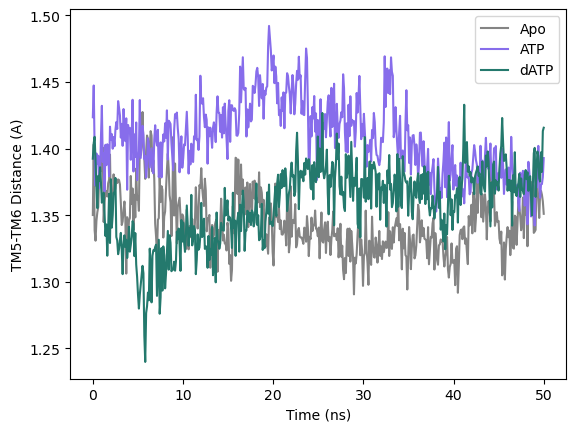

In [39]:
# Plot Results
plt.plot(np.linspace(0,50,500), Apo_5_6_dist, label = 'Apo', color = [0.517, 0.517, 0.517])
plt.plot(np.linspace(0,50,500), ATP_5_6_dist, label = 'ATP', color = [0.529, 0.429, 0.922])
plt.plot(np.linspace(0,50,500), dATP_5_6_dist, label = 'dATP', color = [0.143, 0.476, 0.429])
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('TM5-TM6 Distance (A)')

Text(0, 0.5, 'TM5-TM8 Distance (A)')

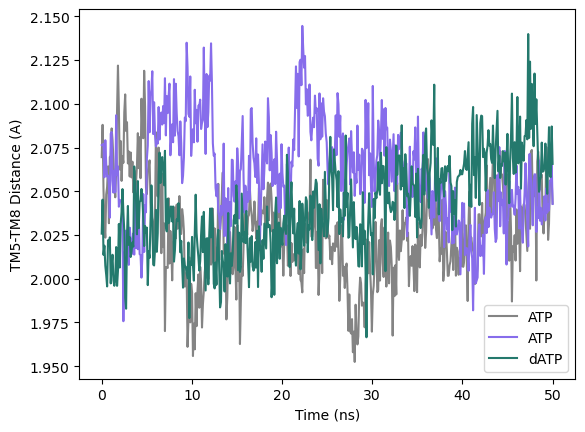

In [40]:
# Plot Results
plt.plot(np.linspace(0,50,500), Apo_5_8_dist, label = 'ATP', color = [0.517, 0.517, 0.517])
plt.plot(np.linspace(0,50,500), ATP_5_8_dist, label = 'ATP', color = [0.529, 0.429, 0.922])
plt.plot(np.linspace(0,50,500), dATP_5_8_dist, label = 'dATP', color = [0.143, 0.476, 0.429])
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('TM5-TM8 Distance (A)')

Text(0, 0.5, 'TM6-TM8 Distance (A)')

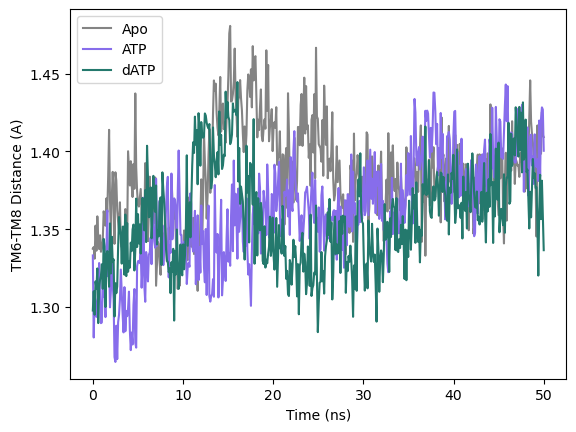

In [41]:
# Plot Results
plt.plot(np.linspace(0,50,500), Apo_6_8_dist, label = 'Apo', color = [0.517, 0.517, 0.517])
plt.plot(np.linspace(0,50,500), ATP_6_8_dist, label = 'ATP', color = [0.529, 0.429, 0.922])
plt.plot(np.linspace(0,50,500), dATP_6_8_dist, label = 'dATP', color = [0.143, 0.476, 0.429])
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('TM6-TM8 Distance (A)')

In [46]:
atoms, bonds = ATP_slice.topology.to_dataframe()
atoms

,serial,name,element,resSeq,resName,chainID,segmentID
0,None,O11,O,995,ATP,0,
1,None,P3,P,995,ATP,0,
2,None,O12,O,995,ATP,0,
3,None,O13,O,995,ATP,0,
4,None,O8,O,995,ATP,0,
5,None,P2,P,995,ATP,0,
6,None,O9,O,995,ATP,0,
7,None,O10,O,995,ATP,0,
8,None,O5,O,995,ATP,0,
9,None,P1,P,995,ATP,0,


In [53]:
atoms, bonds = dATP_slice.topology.to_dataframe()
atoms

,serial,name,element,resSeq,resName,chainID,segmentID
0,None,O10,O,995,DTP,0,
1,None,P3,P,995,DTP,0,
2,None,O11,O,995,DTP,0,
3,None,O12,O,995,DTP,0,
4,None,O7,O,995,DTP,0,
5,None,P2,P,995,DTP,0,
6,None,O8,O,995,DTP,0,
7,None,O9,O,995,DTP,0,
8,None,O4,O,995,DTP,0,
9,None,P1,P,995,DTP,0,


In [62]:
theta_1_indices_ATP, theta_2_indices_ATP = [4, 5, 8, 1], [4, 5, 8, 9]
theta_1_2_angles_ATP = md.compute_dihedrals(ATP_slice, [theta_1_indices_ATP, theta_2_indices_ATP])

theta_1_indices_dATP, theta_2_indices_dATP = [6, 5, 10, 1], [6, 5, 10, 9]
theta_1_2_angles_dATP = md.compute_dihedrals(dATP_slice, [theta_1_indices_dATP, theta_2_indices_dATP])

theta_3_indices_ATP, theta_4_indices_ATP = [8, 9, 12, 5], [9, 12, 13, 8]
theta_3_4_angles_ATP = md.compute_dihedrals(ATP_slice, [theta_3_indices_ATP, theta_4_indices_ATP])

theta_3_indices_dATP, theta_4_indices_dATP = [10, 9, 8, 5], [9, 8, 13, 10]
theta_3_4_angles_dATP = md.compute_dihedrals(dATP_slice, [theta_3_indices_dATP, theta_4_indices_dATP])

theta_5_indices_ATP, theta_6_indices_ATP = [16, 19, 20, 13], [18, 27, 29, 16]
theta_5_6_angles_ATP = md.compute_dihedrals(ATP_slice, [theta_5_indices_ATP, theta_6_indices_ATP])

theta_5_indices_dATP, theta_6_indices_dATP = [16, 19, 20, 13], [18, 26, 28, 16]
theta_5_6_angles_dATP = md.compute_dihedrals(dATP_slice, [theta_5_indices_dATP, theta_6_indices_dATP])

(-3.141592653589793, 3.141592653589793)

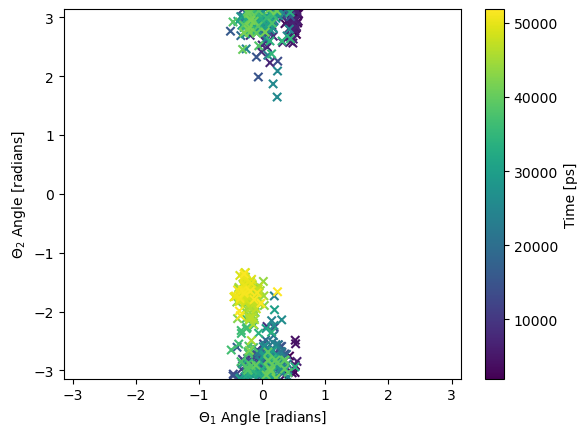

In [63]:
from pylab import *
from math import pi

figure()
scatter(theta_1_2_angles_ATP[:, 0], theta_1_2_angles_ATP[:, 1], marker='x', c=ATP_slice.time)
cbar = colorbar()
cbar.set_label('Time [ps]')
xlabel(r'$\Theta_1$ Angle [radians]')
xlim(-pi, pi)
ylabel(r'$\Theta_2$ Angle [radians]')
ylim(-pi, pi)

(-3.141592653589793, 3.141592653589793)

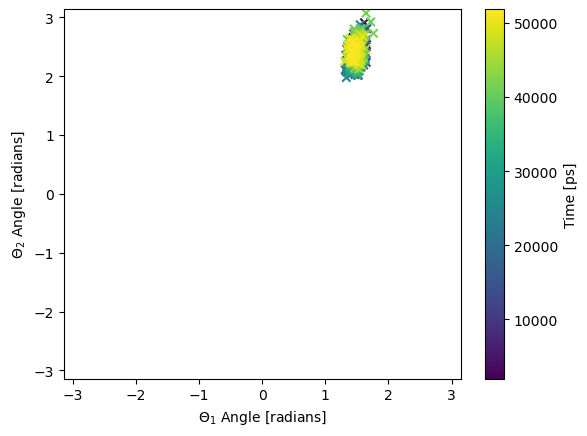

In [64]:
figure()
scatter(theta_1_2_angles_dATP[:, 0], theta_1_2_angles_dATP[:, 1], marker='x', c=dATP_slice.time)
cbar = colorbar()
cbar.set_label('Time [ps]')
xlabel(r'$\Theta_1$ Angle [radians]')
xlim(-pi, pi)
ylabel(r'$\Theta_2$ Angle [radians]')
ylim(-pi, pi)

(-3.141592653589793, 3.141592653589793)

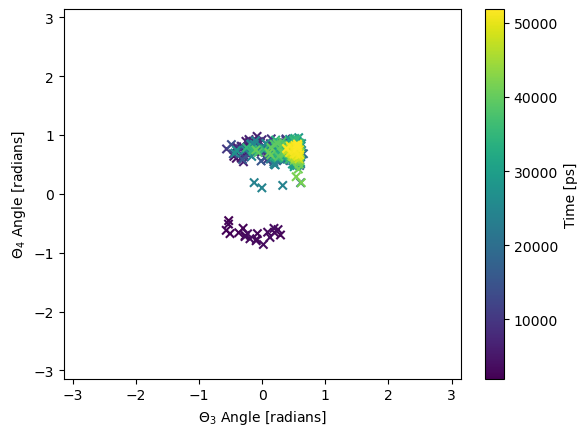

In [65]:
figure()
scatter(theta_3_4_angles_ATP[:, 0], theta_3_4_angles_ATP[:, 1], marker='x', c=ATP_slice.time)
cbar = colorbar()
cbar.set_label('Time [ps]')
xlabel(r'$\Theta_3$ Angle [radians]')
xlim(-pi, pi)
ylabel(r'$\Theta_4$ Angle [radians]')
ylim(-pi, pi)

(-3.141592653589793, 3.141592653589793)

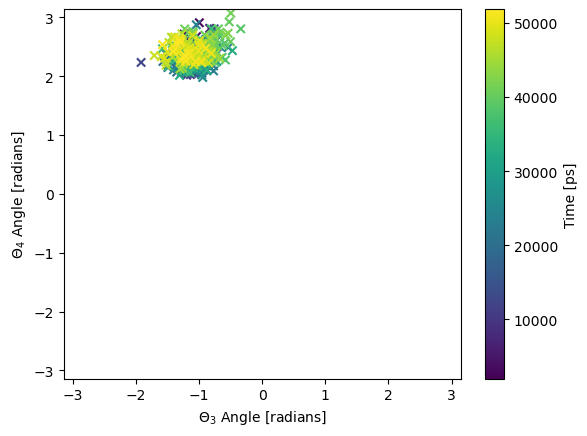

In [66]:
figure()
scatter(theta_3_4_angles_dATP[:, 0], theta_1_2_angles_dATP[:, 1], marker='x', c=dATP_slice.time)
cbar = colorbar()
cbar.set_label('Time [ps]')
xlabel(r'$\Theta_3$ Angle [radians]')
xlim(-pi, pi)
ylabel(r'$\Theta_4$ Angle [radians]')
ylim(-pi, pi)

(-3.141592653589793, 3.141592653589793)

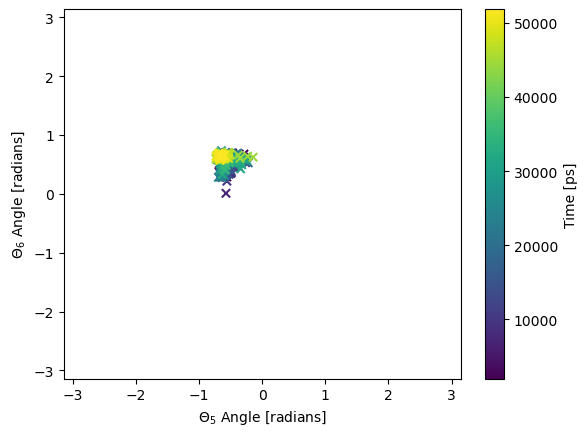

In [67]:
figure()
scatter(theta_5_6_angles_ATP[:, 0], theta_5_6_angles_ATP[:, 1], marker='x', c=ATP_slice.time)
cbar = colorbar()
cbar.set_label('Time [ps]')
xlabel(r'$\Theta_5$ Angle [radians]')
xlim(-pi, pi)
ylabel(r'$\Theta_6$ Angle [radians]')
ylim(-pi, pi)

(-3.141592653589793, 3.141592653589793)

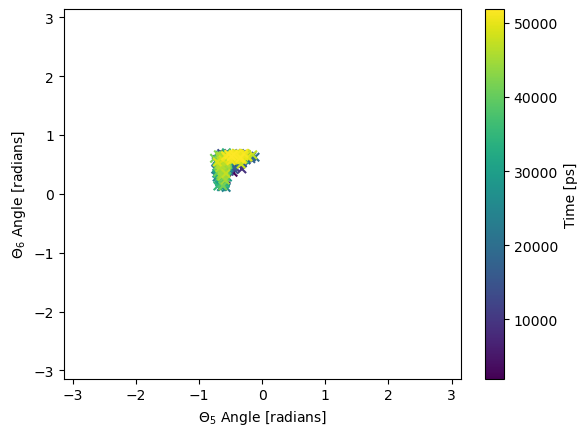

In [68]:
figure()
scatter(theta_5_6_angles_dATP[:, 0], theta_5_6_angles_dATP[:, 1], marker='x', c=dATP_slice.time)
cbar = colorbar()
cbar.set_label('Time [ps]')
xlabel(r'$\Theta_5$ Angle [radians]')
xlim(-pi, pi)
ylabel(r'$\Theta_6$ Angle [radians]')
ylim(-pi, pi)